## Préparation des données 

#### Import des librairies & Acquisition des données 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=Warning)
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator

In [31]:
data = pd.read_csv("data/06e9c61d-e45f-4d74-beb5-e5e53ac6d2de.csv")

In [32]:
data.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


#### Changement des nom des colonnes

In [33]:
data = data.rename(columns={'Unnamed: 0': 'ID logement', 
                          'housing_median_age': 'Age moyen logement', 
                          'total_rooms': 'Total pieces', 
                          'total_bedrooms': 'Total chambres', 
                          'population': 'Nb personne logement', 
                          'households': 'Nb famille logement', 
                          'median_income': 'Salaire median logement',
                          'median_house_value': 'Valeur moyenne logement',
                          'ocean_proximity': 'Proximation Ocean'})

In [34]:
data.head()

,ID logement,longitude,latitude,Age moyen logement,Total pieces,Total chambres,Nb personne logement,Nb famille logement,Salaire median logement,Valeur moyenne logement,Proximation Ocean
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


#### Vérification de la présence de doublons 

In [35]:
def doublon_column(column):
    new_column = column.drop_duplicates()
    if not len(column) == len(new_column):
        return True
    return False

In [36]:
doublon_column(data['ID logement'])

False

#### Imputation des données manquantes

In [37]:
def replace_missing_value(column):
    imputer = KNNImputer(n_neighbors=1)
    new_column = imputer.fit_transform(column)
    return new_column

In [38]:
total_chambres = replace_missing_value(data[["Total chambres"]])
data["Total chambres"] = total_chambres

#### Encodage des variables catégorielles

In [39]:
data["Proximation Ocean"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: Proximation Ocean, dtype: int64

In [40]:
data = pd.get_dummies(data, columns=['Proximation Ocean'], prefix=[""])
data.head()

,ID logement,longitude,latitude,Age moyen logement,Total pieces,Total chambres,Nb personne logement,Nb famille logement,Salaire median logement,Valeur moyenne logement,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0


## Baseline  : Modèle de base

#### Import du modèle

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Séléction des Features X

In [42]:
X = data[["ID logement","longitude","latitude","Age moyen logement",
          "Total pieces","Total chambres","Nb personne logement",
          "Nb famille logement","Salaire median logement","_<1H OCEAN",
          "_INLAND","_ISLAND","_NEAR BAY","_NEAR OCEAN"
         ]]
X = np.array(X)

#### Séléction de la Target Y

In [43]:
Y = data[["Valeur moyenne logement"]]
Y = np.array(Y)

#### On divise notre data set pour avoir les données d'entrainement et d'évaluation.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)
model = LinearRegression()
model.fit(x_train, y_train)
print(f"Notre baseline est de : {model.score(x_test, y_test)}")

Notre baseline est de : 0.6136778649039059


## EDA  : Exploration & Analyse des données

#### Observation de la distribution des données

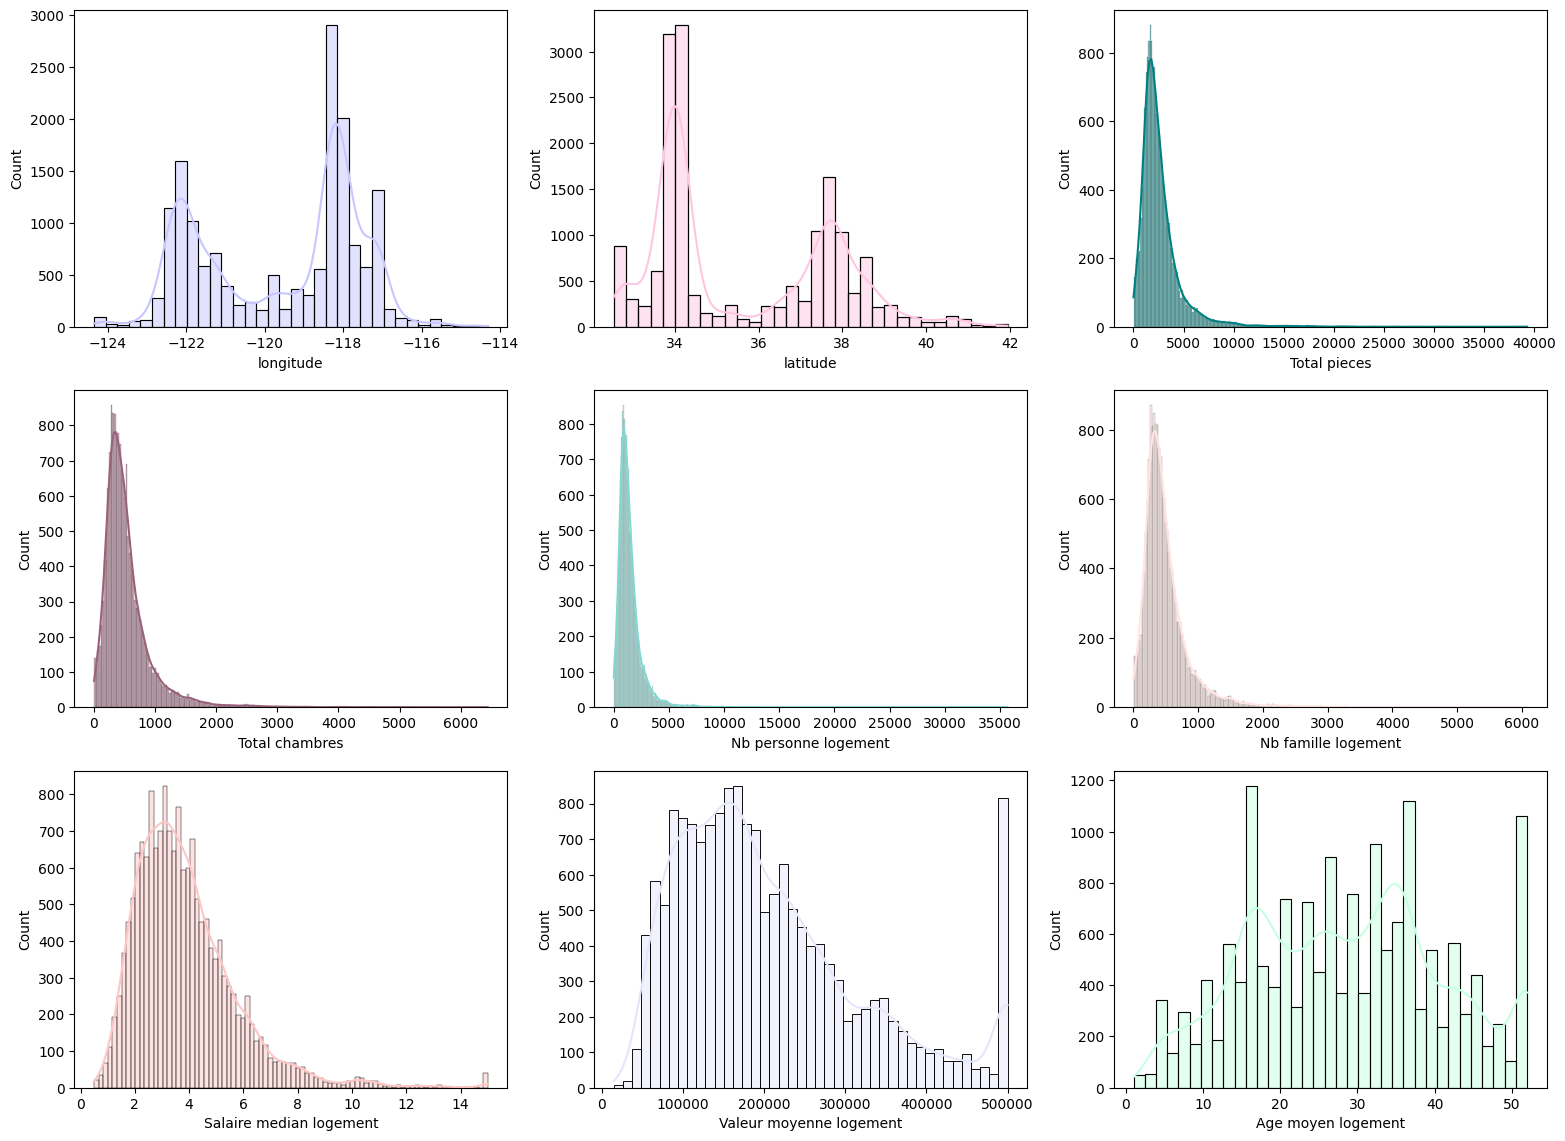

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(19, 14))

sns.histplot(data=data, x="longitude", kde=True, color="#c7c6ff", ax=axs[0, 0])
sns.histplot(data=data, x="latitude", kde=True, color="#ffc6e2", ax=axs[0, 1])
sns.histplot(data=data, x="Total pieces", kde=True, color="#008080", ax=axs[0, 2])

sns.histplot(data=data, x="Total chambres", kde=True, color="#9a617a", ax=axs[1, 0])
sns.histplot(data=data, x="Nb personne logement", kde=True, color="#81d8d0", ax=axs[1, 1])
sns.histplot(data=data, x="Nb famille logement", kde=True, color="#ffe4e1", ax=axs[1, 2])

sns.histplot(data=data, x="Salaire median logement", kde=True, color="#ffc6c6", ax=axs[2, 0])
sns.histplot(data=data, x="Valeur moyenne logement", kde=True, color="#e6e6fa", ax=axs[2, 1])
sns.histplot(data=data, x="Age moyen logement", kde=True, color="#c6ffe3", ax=axs[2, 2])

plt.show()

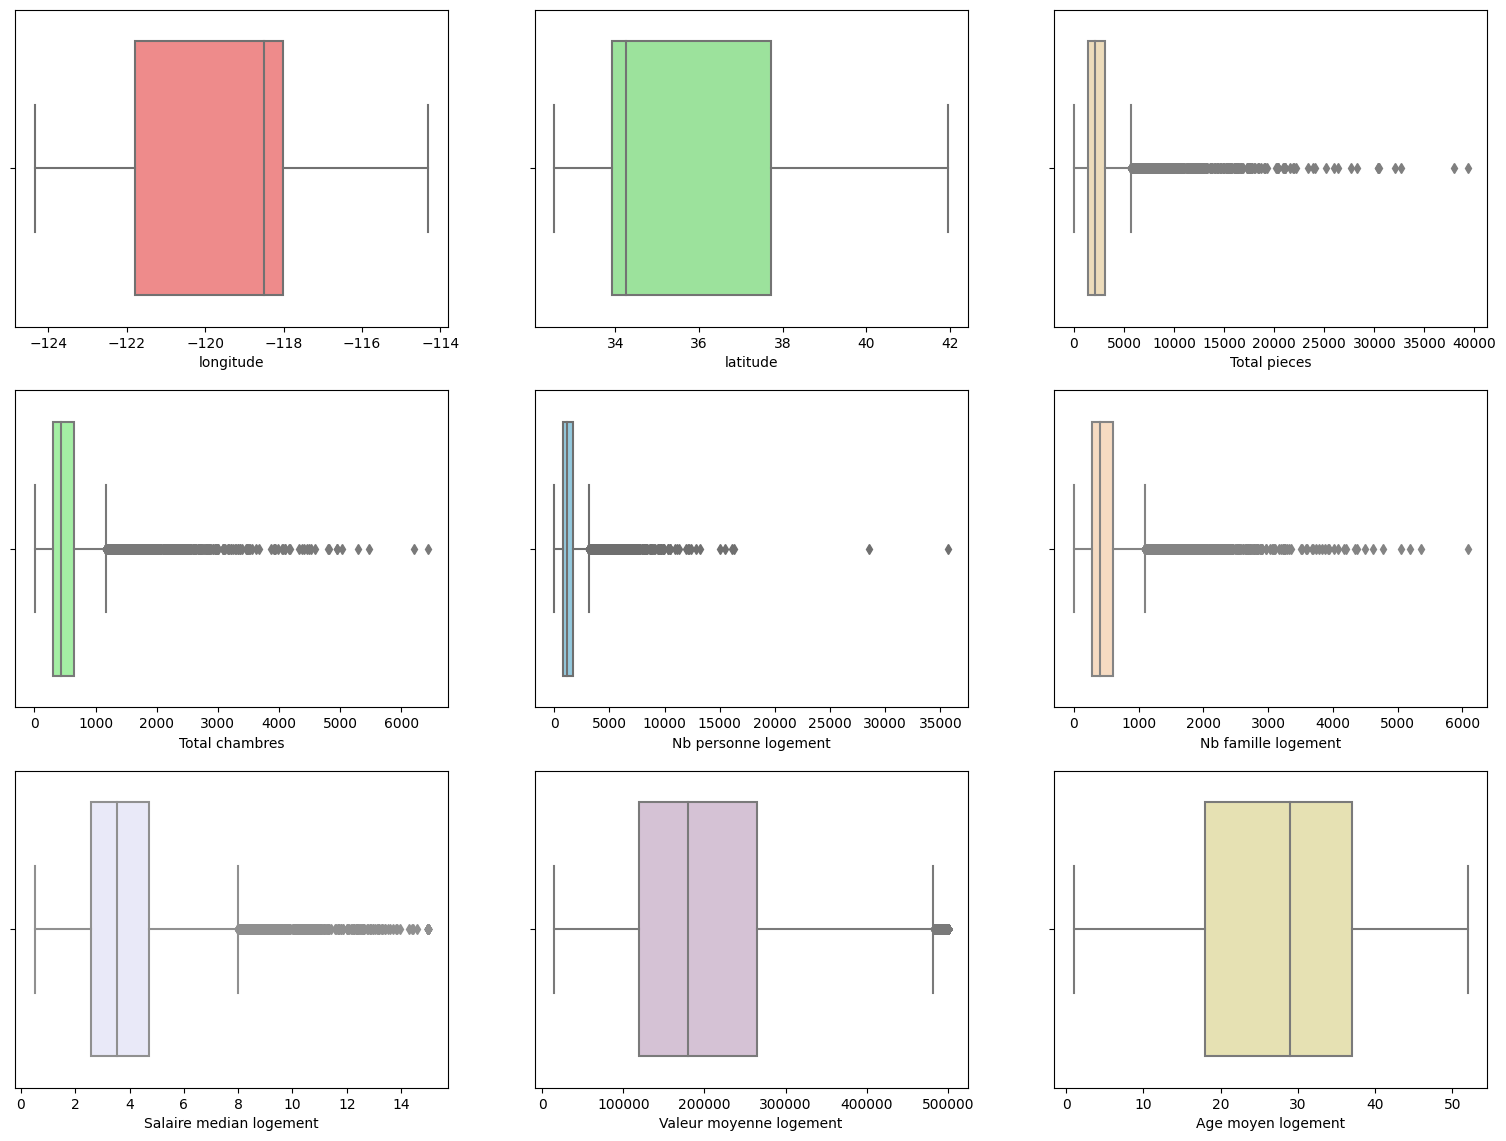

In [59]:
fig, axs = plt.subplots(3, 3, figsize=(19, 14))

sns.boxplot(data=data, x="longitude", color="#ff7a7a", ax=axs[0, 0])
sns.boxplot(data=data, x="latitude", color="lightgreen", ax=axs[0, 1])
sns.boxplot(data=data, x="Total pieces", color="wheat", ax=axs[0, 2])

sns.boxplot(data=data, x="Total chambres", color="palegreen", ax=axs[1, 0])
sns.boxplot(data=data, x="Nb personne logement", color="skyblue", ax=axs[1, 1])
sns.boxplot(data=data, x="Nb famille logement", color="peachpuff", ax=axs[1, 2])

sns.boxplot(data=data, x="Salaire median logement", color="lavender", ax=axs[2, 0])
sns.boxplot(data=data, x="Valeur moyenne logement", color="thistle", ax=axs[2, 1])
sns.boxplot(data=data, x="Age moyen logement", color="palegoldenrod", ax=axs[2, 2])

plt.show()

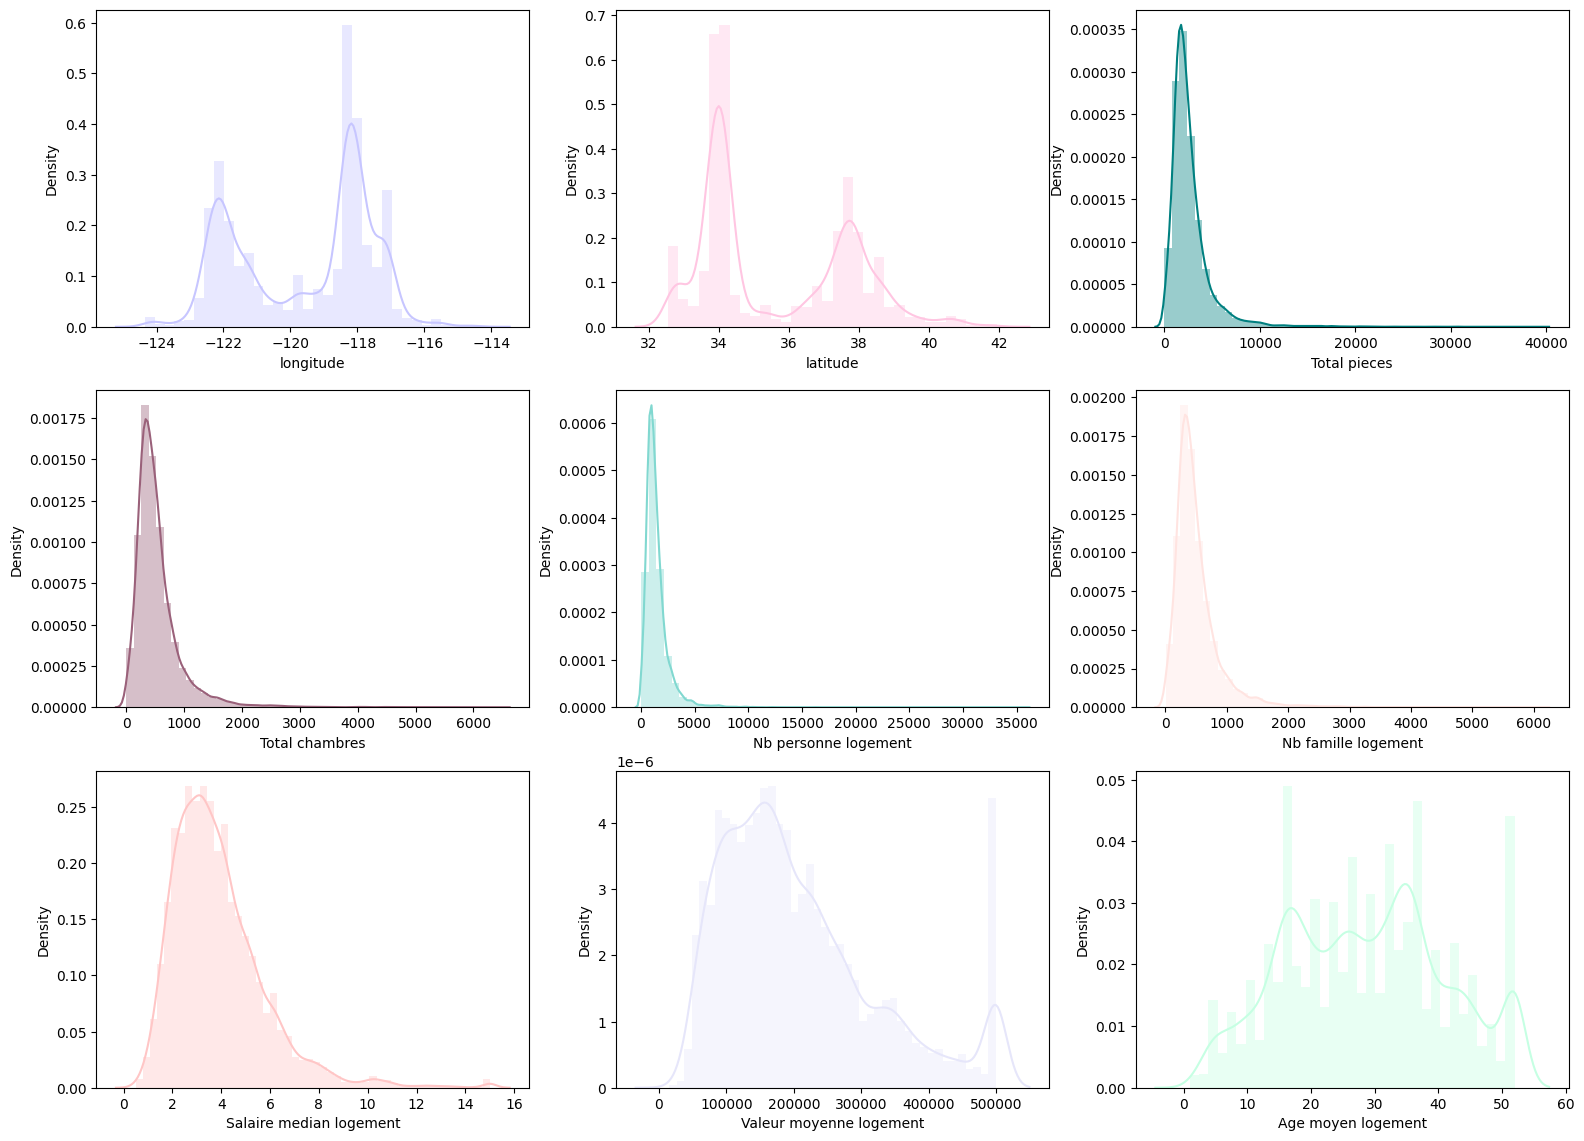

In [60]:
fig, axs = plt.subplots(3, 3,figsize=(19, 14))

sns.distplot(data["longitude"], ax=axs[0, 0], color="#c7c6ff")
sns.distplot(data["latitude"], ax=axs[0, 1], color="#ffc6e2")
sns.distplot(data["Total pieces"], ax=axs[0, 2], color="#008080")

sns.distplot(data["Total chambres"], ax=axs[1, 0], color="#9a617a")
sns.distplot(data["Nb personne logement"], ax=axs[1, 1], color="#81d8d0")
sns.distplot(data["Nb famille logement"], ax=axs[1, 2], color="#ffe4e1")

sns.distplot(data["Salaire median logement"], ax=axs[2, 0], color="#ffc6c6")
sns.distplot(data["Valeur moyenne logement"], ax=axs[2, 1], color="#e6e6fa")
sns.distplot(data["Age moyen logement"], ax=axs[2, 2], color="#c6ffe3")

plt.show()

Nous pouvons constater avec ces différents graphique qu'il y a une forte présence d'outliers pour les colonnes : <br>
=> Total Chambres <br>
=> Nb personne logement <br>
=> Nb famille logement <br>
=> Total pieces <br>

#### Identifiction des corrélations des données

<AxesSubplot:>

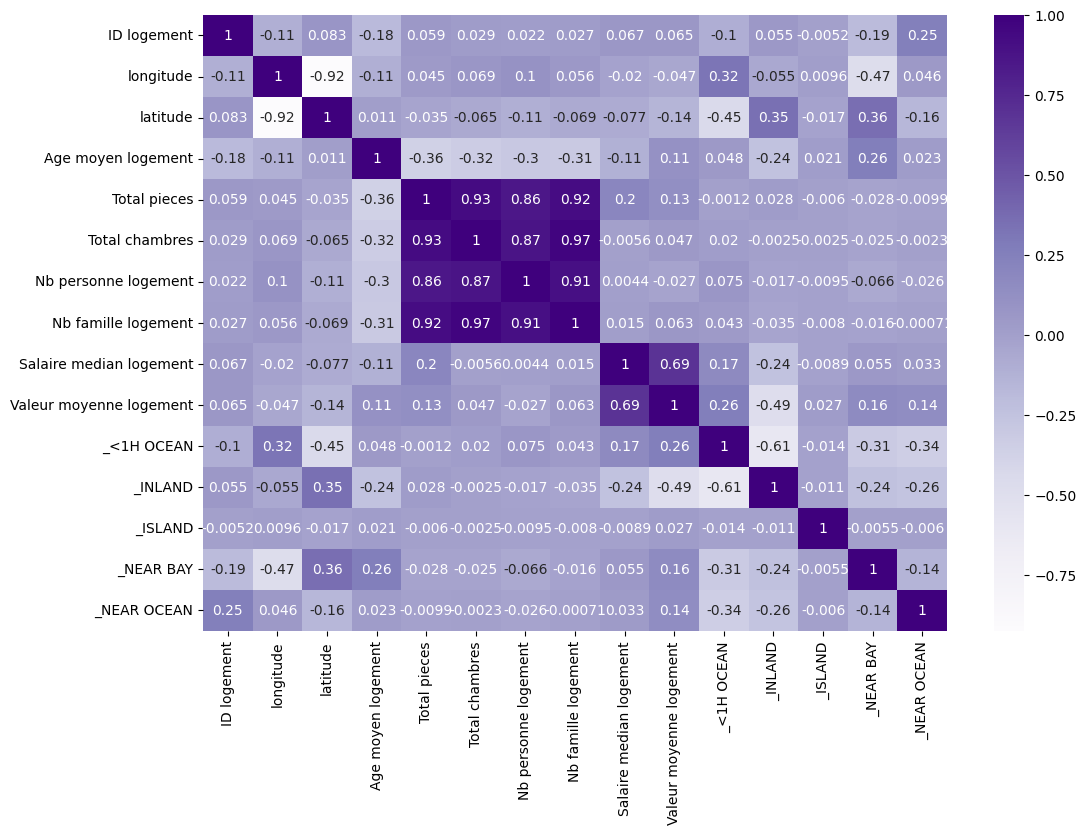

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='Purples')

Nous pouvons constater que la Target (Valeur moyenne logement) à une corrélation avec les données : <br>
=> <1H OCEAN <br>
=> _INLAND <br>
Les colonnes : Total pieces, Total chambres, Nb personne logement, Nb famille logement sont fortement corrélers. <br>

## Scaling des données 

Nous avons différentes techniques de Scaling : <br>
=> L'algorithmme MinmaxScaler <br>
=> L'algorithmme StandardScaler <br>
=> L'algorithmme RobustScaler <br>

#### Séléction des données X

In [49]:
X = data[["longitude","latitude",
          "Age moyen logement",
          "Total pieces","Total chambres",
          "Nb personne logement",
          "Nb famille logement",
          "Salaire median logement",
          "Valeur moyenne logement"
         ]]
X_array = np.array(X)

#### Algorithme MinMaxScaler (Normalisation)

L'algorithme MinMaxScaler va transformer chaque variable de tel sorte à ce que les valeurs soit toutes comprise entre 0 et 1. <br>
Pour cela on soustrait chaque valeur d'une variable au minimum de cette variable <br>
Puis on divise par l'écart entre le maximum de la variable et le minimum de la variable

In [50]:
from sklearn.preprocessing import MinMaxScaler

#### Algorithme Standariser (Standarisation)

L'algorithme StandardScaler va transformer chaque variable de tel sorte à ce que chaque variable est une moyenne de 0 et un écart type égal à 1.
Pour cela il faut soustraire chaque valeur à la moyenne initiale de notre variable et diviser le tout par l'écart type initiale de la variable   

In [51]:
from sklearn.preprocessing import StandardScaler

#### Algorithme Robuster 

Comme nous l'avons constater précédemment, le dataset contient énormément d'outliers. <br>
Face à cette situation, nous avons une autre alternative que de supprimer les outliers. <br>
Nous pouvons utiliser l'algorithme RobusteScaler qui lui est très peu sensible aux outliers.

In [52]:
from sklearn.preprocessing import RobustScaler

#### Comparaison des différentes techniques de Scaling avec les données original.

In [53]:
X_minmax = MinMaxScaler().fit_transform(X_array)
X_standard = StandardScaler().fit_transform(X_array)
X_robust = RobustScaler().fit_transform(X_array)

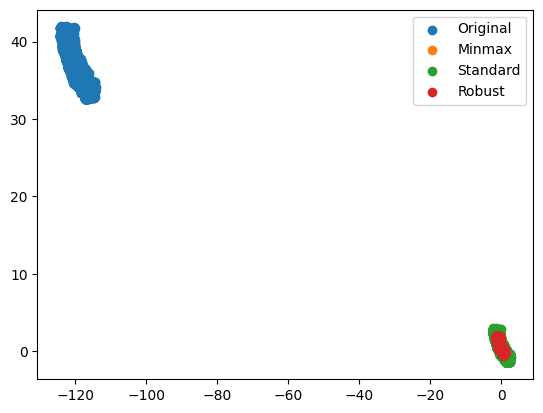

In [54]:
plt.scatter(X_array[:, 0], X_array[:, 1], label="Original")
plt.scatter(X_minmax[:, 0], X_minmax[:, 1], label="Minmax")
plt.scatter(X_standard[:, 0], X_standard[:, 1], label="Standard")
plt.scatter(X_robust[:, 0], X_robust[:, 1], label="Robust")
plt.legend()

#### On prépare et on importe le dataset pour l'inférence statistique.

Fonction permettent de mettre en place le dataset, et l'exporter en format csv

In [55]:
def prepare_data(scaling_algorithme):
    # Conversation array ===> DataFrame.     
    df_final = pd.DataFrame(scaling_algorithme, columns = ["longitude","latitude",
          "Age moyen logement",
          "Total pieces","Total chambres",
          "Nb personne logement",
          "Nb famille logement",
          "Salaire median logement",
          "Valeur moyenne logement"
         ])
    # On remet en place les variables quantitatives.     
    df_categorie = data[["_<1H OCEAN","_INLAND","_ISLAND","_NEAR BAY","_NEAR OCEAN"]]
    # On merge les deux DatFrames.    
    liste_concat = [df_final, df_categorie]
    df_final = pd.concat(liste_concat, axis=1)
    # On exporte le dataframe final.     
    return df_final.to_csv('df_minmax.csv', index=False)

On appelle la fonction en choissisant l'algorithme de Scaling

In [56]:
algorithme = [X_minmax, X_standard, X_robust]

In [57]:
prepare_data(algorithme[0])